In [4]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import csv
import folium

%matplotlib inline

In [5]:
#Part 1(Cheikh Kayré Mbengue)
df = pd.read_csv ('transport-nodes.csv')
df.head(12)

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [6]:
dh = pd.read_csv('transport-relationships.csv')
dh.head(15)

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


In [7]:
#creation of table to recover every towns
ville = []
i=0
while i<12:
    ville.append((df['id'][i]))
    i=i+1
print(ville)

['Amsterdam', 'Utrecht', 'Den Haag', 'Immingham', 'Doncaster', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'London', 'Rotterdam', 'Gouda']


In [8]:
#creation of a table to recover the population of towns
population = []
i=0
while i<12:
    population.append((df['population'][i])//1000)
    i=i+1
print(population)

[821, 334, 514, 9, 302, 9, 23, 133, 104, 8787, 623, 70]


In [9]:
#List to keep nodes and their destination
listNoeuds = []
i=0
while i<15:
    listNoeuds.append((str(dh['src'][i]),str(dh['dst'][i])))
    i=i+1

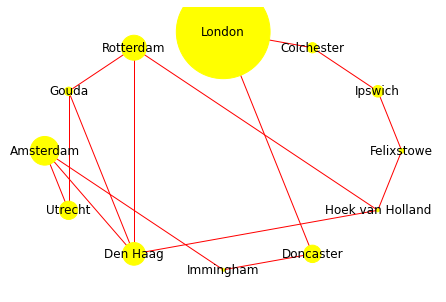

In [10]:
dessiner = nx.Graph()
i = 0
while i<12:
    dessiner.add_node(df['id'][i])
    i=i+1
dessiner.add_edges_from(listNoeuds)
nx.draw_shell(dessiner, with_labels=True,node_size=population, node_color='yellow',edge_color='red')

In [11]:
dict(dessiner.nodes.data())

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Immingham': {},
 'Doncaster': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'London': {},
 'Rotterdam': {},
 'Gouda': {}}

In [12]:
AjoutDict = {}
#function to add attribute in the graph nodes
def AjouterAttribut(myGraph,dfnode,NameAtt,Index):
    i=0
    while i<12:
        AjoutDict[(dfnode[Index][i])] = ({NameAtt : dfnode[NameAtt][i] })
        i=i+1
        nx.set_node_attributes(myGraph, AjoutDict)

In [17]:
AjouterAttribut(dessiner,df,'population','id')
AjouterAttribut(dessiner,df,'latitude','id')
AjouterAttribut(dessiner,df,'longitude','id')

In [18]:
dict(dessiner.nodes.data())

{'Amsterdam': {'population': 821752,
  'latitude': 52.379189,
  'longitude': 4.899431},
 'Utrecht': {'population': 334176,
  'latitude': 52.092876,
  'longitude': 5.10448},
 'Den Haag': {'population': 514861,
  'latitude': 52.078663,
  'longitude': 4.288788},
 'Immingham': {'population': 9642,
  'latitude': 53.61239,
  'longitude': -0.22219},
 'Doncaster': {'population': 302400,
  'latitude': 53.52285,
  'longitude': -1.13116},
 'Hoek van Holland': {'population': 9382,
  'latitude': 51.9775,
  'longitude': 4.13333},
 'Felixstowe': {'population': 23689,
  'latitude': 51.96375,
  'longitude': 1.3511},
 'Ipswich': {'population': 133384, 'latitude': 52.05917, 'longitude': 1.15545},
 'Colchester': {'population': 104390,
  'latitude': 51.88921,
  'longitude': 0.90421},
 'London': {'population': 8787892,
  'latitude': 51.509865,
  'longitude': -0.118092},
 'Rotterdam': {'population': 623652,
  'latitude': 51.9225,
  'longitude': 4.47917},
 'Gouda': {'population': 70939, 'latitude': 52.01667, 

In [20]:
for i in dessiner.nodes:
    basemap = folium.Map(location = [dessiner.nodes[i]['latitude'], dessiner.nodes[i]['longitude']],
        tiles='Stamen Toner', width='%100', height='%100', zoom_start=5)

In [21]:
basemap

In [22]:
#Adding markers to all nodes in the folium network using folium.Marker
def marker(desssiner):
     for i in dessiner.nodes:
        folium.Marker([dessiner.nodes[i]['latitude'],dessiner.nodes[i]['longitude']],zoom_start=5).add_to(basemap)
     return basemap

In [23]:
marker(dessiner)

In [25]:
#function to build image Point
def construirePointsImage(dessiner):
    points=[]
    for i in dessiner.nodes:
        for neighbor in dessiner.neighbors(i):
            points.append([[dessiner.nodes[i]['latitude'], dessiner.nodes[i]['longitude']], [dessiner.nodes[neighbor]['latitude'], dessiner.nodes[neighbor]['longitude']]])
    return points

In [26]:
coordonneesvoisins = construirePointsImage(dessiner)
print(coordonneesvoisins)

[[[52.379189, 4.899431], [52.092876, 5.10448]], [[52.379189, 4.899431], [52.078663, 4.288788]], [[52.379189, 4.899431], [53.61239, -0.22219]], [[52.092876, 5.10448], [52.379189, 4.899431]], [[52.092876, 5.10448], [52.01667, 4.70833]], [[52.078663, 4.288788], [52.379189, 4.899431]], [[52.078663, 4.288788], [51.9225, 4.47917]], [[52.078663, 4.288788], [51.9775, 4.13333]], [[52.078663, 4.288788], [52.01667, 4.70833]], [[53.61239, -0.22219], [52.379189, 4.899431]], [[53.61239, -0.22219], [53.52285, -1.13116]], [[53.52285, -1.13116], [53.61239, -0.22219]], [[53.52285, -1.13116], [51.509865, -0.118092]], [[51.9775, 4.13333], [52.078663, 4.288788]], [[51.9775, 4.13333], [51.96375, 1.3511]], [[51.9775, 4.13333], [51.9225, 4.47917]], [[51.96375, 1.3511], [51.9775, 4.13333]], [[51.96375, 1.3511], [52.05917, 1.15545]], [[52.05917, 1.15545], [51.96375, 1.3511]], [[52.05917, 1.15545], [51.88921, 0.90421]], [[51.88921, 0.90421], [52.05917, 1.15545]], [[51.88921, 0.90421], [51.509865, -0.118092]], [[

In [30]:
#function to create and display the base map
def visualiserFolium(dessiner, points, locationpardefaut = [52.3791890, 4.899431], tiles='Stamen Toner', explored = None ):
    basemapp = folium.vector_layers.PolyLine(points, color='yellow', weight=3).add_to(basemap)
    return basemapp

In [33]:
visualiserFolium(dessiner, coordonneesvoisins)

In [34]:
basemap

In [2]:
#Part number 2(Cheikh Kayré Mbengue)
import csv

class Noeud:
    
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    
    #defining custom getters and settters   
    def setAttribut(self,key,values):
        self.attributs[key]=values
        
    def getAttribut(self,key):
        return self.attributs[key] 

    def getName(self):
        return self.name
     
    def egal(self, noeud):
        if self.name == noeud.getName():
            return True
        return False

    def getCoutMin(self):
        pass

    def getCout(self,noeud):
        pass
    
    

#Graph Class
class Graphe:
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    #function to create node    
    def creerNoeuds(self,fichiernoeuds): 
        listNoeuds=[]
        with open(fichiernoeuds, 'r') as file: #pour la lecture du fichier csv
            readAll = csv.DictReader(file) #lecture du fichier en gros
            for i in readAll:
                newNoeud=Noeud(i['id']) #creation d'un nouveau noeud
                newNoeud.setAttribut('latitude',i['latitude'])
                newNoeud.setAttribut('longitude',i['longitude']) 
                newNoeud.setAttribut('population',i['population'])
                ln=self.noeuds.append(newNoeud)
                listNoeuds+=[ln]
        
        self.noeuds=listNoeuds
        return self.noeuds
    
      #function to create arcs
    def creerArc(self, fichierarcs):
        arcs=[]
        with open(fichierarcs, 'r') as file:
            readAll = csv.DictReader(file)
            for i in readAll:
                self.arcs['src']=i['src']
                self.arcs['dst']=i['dst']
                self.arcs['relationship']=i['relationship']
                self.arcs['cost']=i['cost']
                var=self.arcs.copy()
                arcs+=[var]
                for aff in self.noeuds:
                    if aff.getName()==i['src']:
                        tuple=(i['dst'],i['cost'])
                        aff.listeNomVoisin.append(tuple)
        self.arcs=arcs                
        return self.arcs
    
    #function to get a specific node
    def getNoeud(self,name):
        for recup in self.noeuds:
                if recup.getName()==name:
                    return recup
        return 'Nom Introuvable'
    
     #function to get neighbors of a specific node
    def getVoisins(self, noeud):
        Voisins=noeud.listeNomVoisin.copy()
        mesVoisins=[]
        for get in Voisins:
            mesVoisins+=[self.getNoeud(get[0])]
            print(mesVoisins[0].getName())
        return mesVoisins
    
    #function to get coordinates of a node
    def getCoordonnesVoisins(self,noeud):
            noeudVoisins=self.getVoisins(noeud)
            listCoordonnes=[]
            for i in noeudVoisins:
                tmp=[i.getAttribut('latitude'),i.getAttribut('longitude')]
                listCoordonnes+=[tmp]
            return listCoordonnes

    #function to get a list of coordinates
    def getListeCoordonnees(self,listeNoeud):
            NomNoeud=[]
            for i in listeNoeud:
                getNoeudCoord=[self.getNoeud(i).getAttribut('latitude'),self.getNoeud(i).getAttribut('longitude')]
                NomNoeud+=[getNoeudCoord]
            return NomNoeud
        
     #function to get     
    def visualiserFolium(self):
            visual = folium.Map(location=[52.3791890, 4.899431],tiles='Stamen Toner',explored=None)
            for i in self.noeuds:
                folium.Marker([i.getAttribut('latitude'),i.getAttribut('longitude')], popup=i.getName()).add_to(visual)
            return visual
        



In [37]:
aff = Graphe()
aff.creerNoeuds('transport-nodes.csv')

[None, None, None, None, None, None, None, None, None, None, None, None]

In [38]:
aff = Graphe()
aff.creerArc("transport-relationships.csv")

[{'src': 'Amsterdam', 'dst': 'Utrecht', 'relationship': 'EROAD', 'cost': '46'},
 {'src': 'Amsterdam',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '59'},
 {'src': 'Den Haag',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': '26'},
 {'src': 'Amsterdam',
  'dst': 'Immingham',
  'relationship': 'EROAD',
  'cost': '369'},
 {'src': 'Immingham',
  'dst': 'Doncaster',
  'relationship': 'EROAD',
  'cost': '74'},
 {'src': 'Doncaster', 'dst': 'London', 'relationship': 'EROAD', 'cost': '277'},
 {'src': 'Hoek van Holland',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '27'},
 {'src': 'Felixstowe',
  'dst': 'Hoek van Holland',
  'relationship': 'EROAD',
  'cost': '207'},
 {'src': 'Ipswich',
  'dst': 'Felixstowe',
  'relationship': 'EROAD',
  'cost': '22'},
 {'src': 'Colchester',
  'dst': 'Ipswich',
  'relationship': 'EROAD',
  'cost': '32'},
 {'src': 'London',
  'dst': 'Colchester',
  'relationship': 'EROAD',
  'cost': '106'},
 {'src': 'Gouda', 'dst': 'Rotterdam',

In [39]:
aff.visualiserFolium()

In [66]:
#Part 4 (Mohamed Ndoye)
#will traverse the graph using the depth first search algorithm
def parcours_dfs(myGraphe, noeud_src, noeud_dest):
    node_to_visit = [noeud_src]
    node_visited = []

    while node_to_visit:
        vertex = node_to_visit.pop()
       
        if vertex in node_visited:
            continue
        
        node_visited.append(vertex)
        if vertex == noeud_dest:
            break
        for neighbor in myGraphe[vertex]:
            node_to_visit.append( neighbor)
    return node_visited


In [6]:
tncsv = pd.read_csv('transport-relationships.csv')
makeGraph = tncsv[['src', 'dst']]
F = nx.from_pandas_edgelist(makeGraph, 'src', 'dst')

In [69]:
print(parcours_dfs(F, 'Amsterdam', 'Rotterdam'))

['Amsterdam', 'Immingham', 'Doncaster', 'London', 'Colchester', 'Ipswich', 'Felixstowe', 'Hoek van Holland', 'Rotterdam']


In [58]:

#will traverse the graph using the breadth first search algorithm
def parcours_bfs(myGraphe, noeud_src, noeud_dst):
    visit_complete=[noeud_src]
    queue = []
    queue.append(noeud_src)

    while queue:
        s = queue.pop(0)
        print(s)
        if s == noeud_dst:
            return
               
        if s is noeud_dst:
            return
        for neighbour in myGraphe[s]:
            if neighbour not in visit_complete:
                visit_complete.append(neighbour)
                queue.append(neighbour)
            
            

In [60]:
print(parcours_bfs(F, 'Amsterdam', 'Immingham'))

Amsterdam
Utrecht
Den Haag
Immingham
LE VOILA
None


In [5]:
g = Graphe()
g.visualiserFolium()

In [70]:
#Part 3(Mohamed Ndoye)
class Pile:
    #constructor to initialize our stack
    def __init__(self) -> None:
        self.elements = []

    #insertion at the top of the stack
    def push(self, noeud):
        self.elements.append(noeud)

    #will return true if a specified node is in the stack
    def contains_noeud(self, name):
        for i in self.elements:
            return i == name

    #will return true if the stack is empty
    def empty(self):
        return len(self.elements) > 0

    #will delete and return the element at
    # the very top of the stack
    # will return an exception if the stack is empty
    def remove(self):
        if self.elements == []:
            raise FileExistsError
        return self.elements.pop()
    
p=Pile()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
p.remove() #the first element of the queue will be removed
print(p.elements)

['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mamadou', 'Mansour', 'Dame']


In [71]:
#Implementation of the Queue class by inheritance
class File(Pile):
    #constructor to initialize the queue
    def __init__(self) -> None:
        super().__init__()

    #will remove the last element of the queue
    def remove(self):
        if self.elements == []:
            raise FileExistsError
        return self.elements.pop(0)



In [72]:
p=File()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
p.remove() #the first element of the queue will be removed
print(p.elements)

['Mamadou', 'Mansour', 'Dame', 'Khady']
['Mansour', 'Dame', 'Khady']
